In [284]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [285]:
data=pd.read_csv('happiness_score_dataset.csv')
df=pd.DataFrame(data=data)
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [286]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


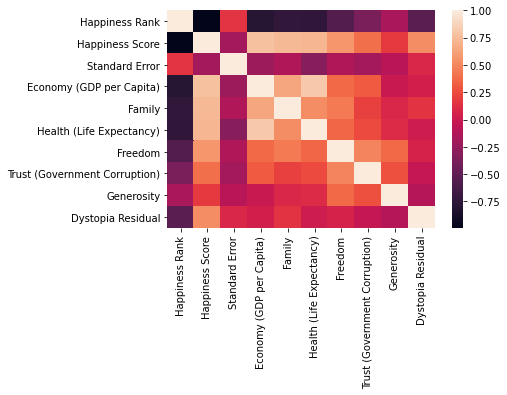

In [287]:
sns.heatmap(df.corr())

Above correlation heatmap we observe that Happiness score and Happiness rank has high negative correlation while Happiness score and Standard Error has negative correlation. On the other hand Happiness score has very positive or linear correlation with Economy,Family and Health attributes.

In [288]:
df_new=df.drop(columns=['Region','Happiness Rank','Standard Error'],axis=1)
df_new

,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,Rwanda,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [289]:
df = pd.DataFrame(df_new, columns = ['Country'])
pd.DataFrame.drop_duplicates(df)

,Country
0,Switzerland
1,Iceland
2,Denmark
3,Norway
4,Canada
...,...
153,Rwanda
154,Benin
155,Syria
156,Burundi


In [290]:
df_new.dtypes

Country                           object
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [291]:
df_new.skew()

Happiness Score                  0.097769
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [292]:
df_new.describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


From above table we obseve that Trust and Generosity attributes are positively skewed(mean>median) and also they might have outliers within as there is significant difference between Q3 and max in both.

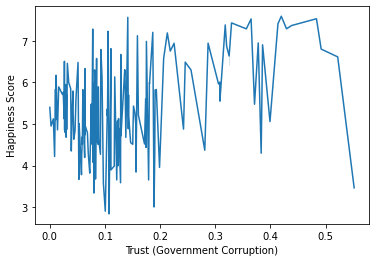

In [293]:
sns.lineplot(x='Trust (Government Corruption)',y='Happiness Score',data=df_new)

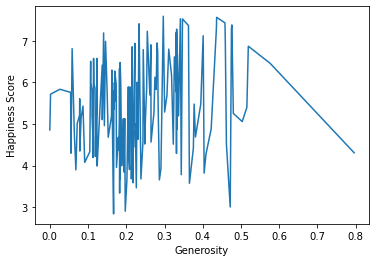

In [294]:
sns.lineplot(x='Generosity',y='Happiness Score',data=df_new)

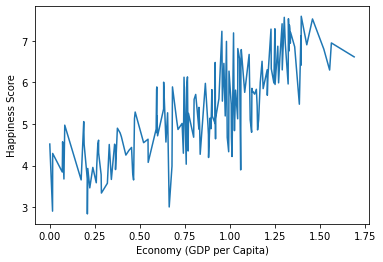

In [295]:
sns.lineplot(x='Economy (GDP per Capita)',y='Happiness Score',data=df_new)

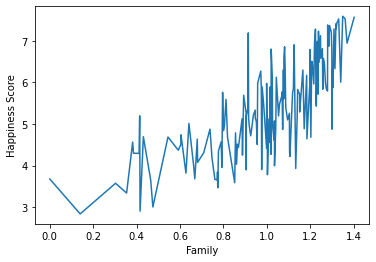

In [296]:
sns.lineplot(x='Family',y='Happiness Score',data=df_new)

Happiness Score                     AxesSubplot(0.125,0.536818;0.168478x0.343182)
Economy (GDP per Capita)         AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Family                           AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Health (Life Expectancy)         AxesSubplot(0.731522,0.536818;0.168478x0.343182)
Freedom                                AxesSubplot(0.125,0.125;0.168478x0.343182)
Trust (Government Corruption)       AxesSubplot(0.327174,0.125;0.168478x0.343182)
Generosity                          AxesSubplot(0.529348,0.125;0.168478x0.343182)
Dystopia Residual                   AxesSubplot(0.731522,0.125;0.168478x0.343182)
dtype: object

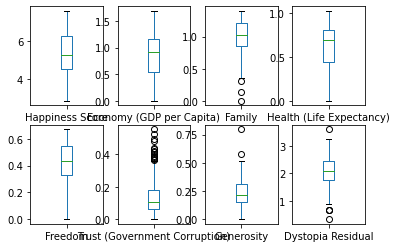

In [298]:
df_new.plot(kind='box',subplots=True,layout=(2,4))

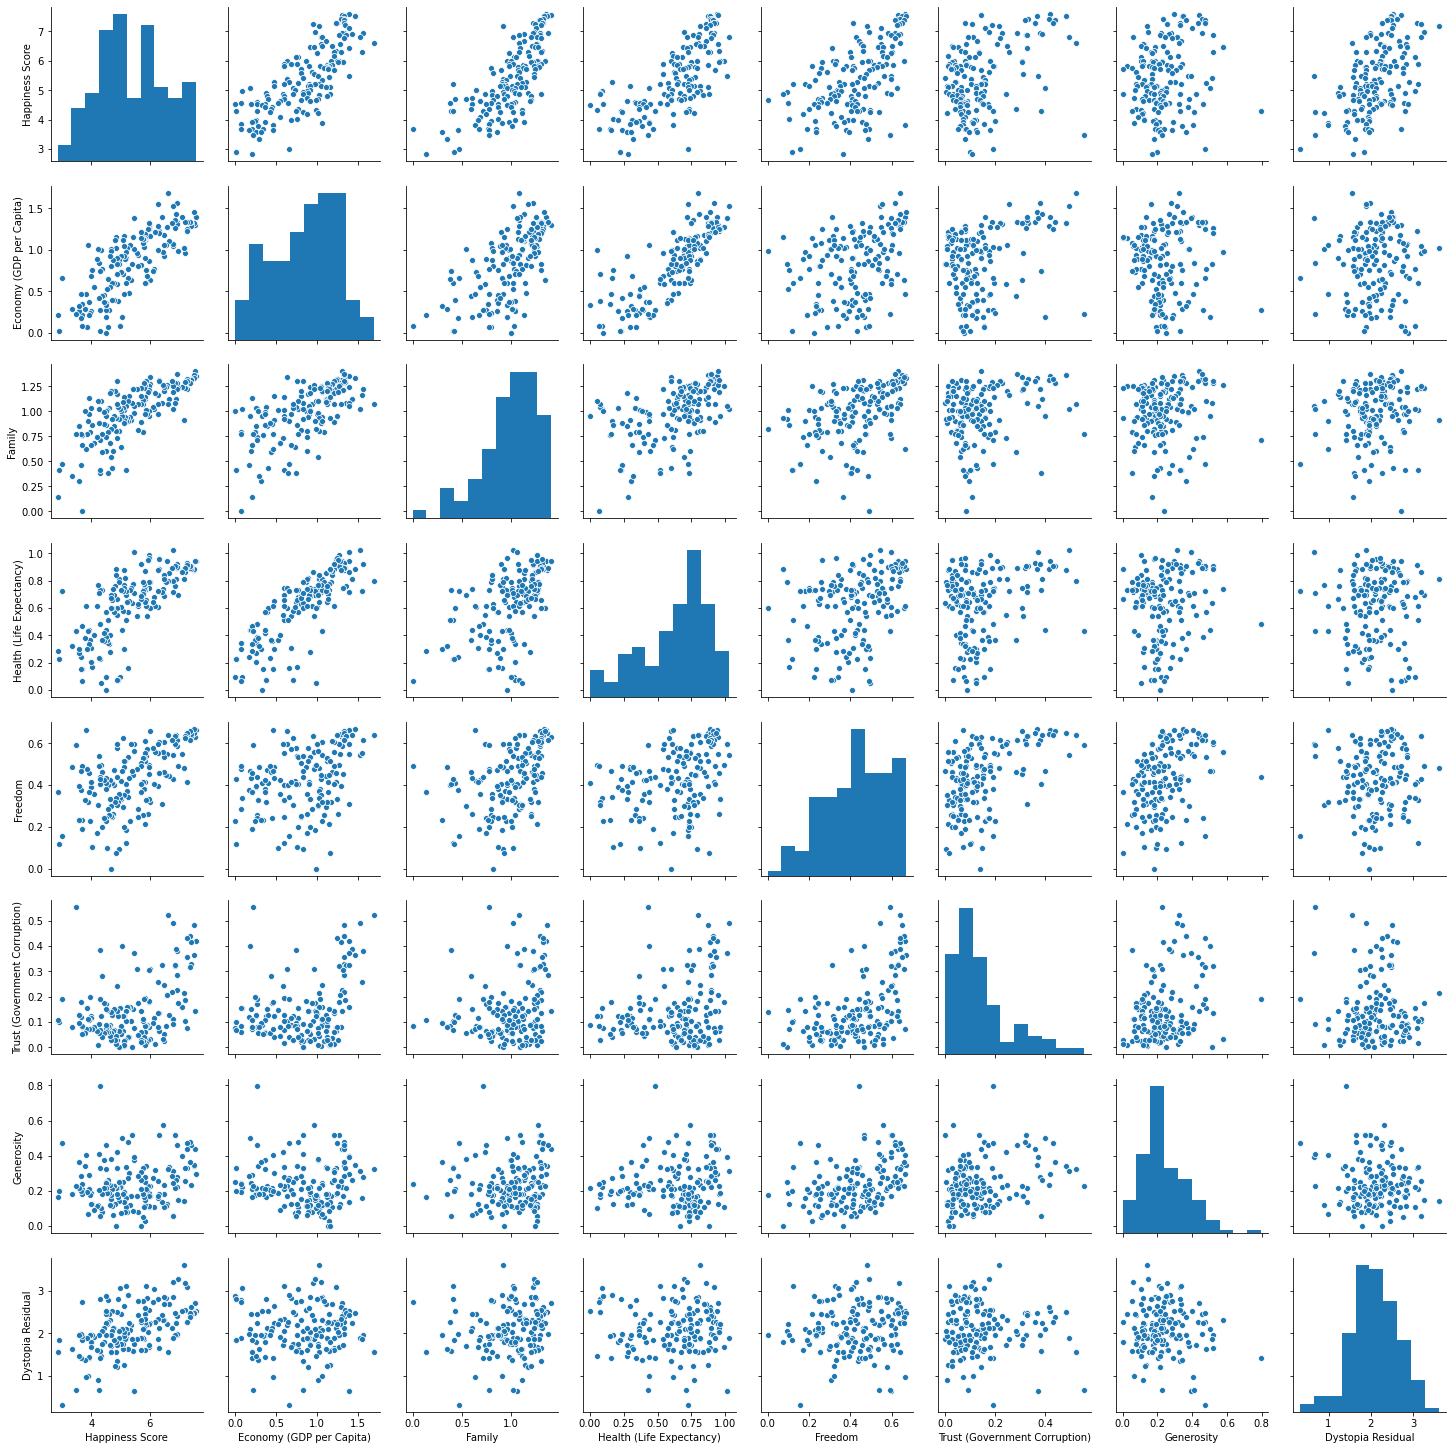

In [299]:
sns.pairplot(df_new)

In [300]:
df_new.isnull().sum()

Country                          0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

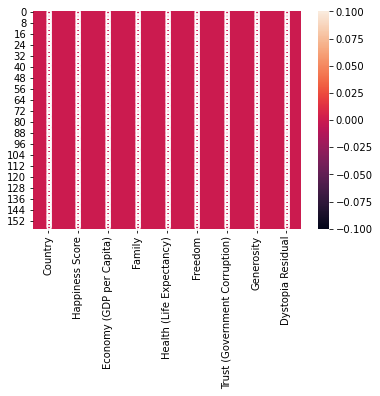

In [301]:
sns.heatmap(df_new.isnull(),annot=True)

In [302]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_new['Country']=le.fit_transform(df_new.Country)
df_new

,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,118,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [303]:
from scipy.stats import zscore
z=np.abs(zscore(df_new))
df_NEW=df_new[(z<3).all(axis=1)]
df_NEW

,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
150,66,3.655,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [304]:
df_NEW.skew()

Country                          0.042505
Happiness Score                  0.165587
Economy (GDP per Capita)        -0.401110
Family                          -0.815356
Health (Life Expectancy)        -0.733453
Freedom                         -0.406211
Trust (Government Corruption)    1.287270
Generosity                       0.646579
Dystopia Residual               -0.045578
dtype: float64

In [305]:
df_NEW['Trust (Government Corruption)'].isnull().values.any()

False

In [306]:
for col in df_NEW.columns:
    if df_NEW.skew().loc[col]>0.5:
        df_NEW[col]=np.log(df_NEW[col])

In [307]:
df_NEW.skew()

Country                          0.042505
Happiness Score                  0.165587
Economy (GDP per Capita)        -0.401110
Family                          -0.815356
Health (Life Expectancy)        -0.733453
Freedom                         -0.406211
Trust (Government Corruption)         NaN
Generosity                            NaN
Dystopia Residual               -0.045578
dtype: float64

In [308]:
df_NEW.replace([np.inf, -np.inf], np.nan, inplace=True)

In [309]:
df_NEW.skew()

Country                          0.042505
Happiness Score                  0.165587
Economy (GDP per Capita)        -0.401110
Family                          -0.815356
Health (Life Expectancy)        -0.733453
Freedom                         -0.406211
Trust (Government Corruption)   -0.811194
Generosity                      -2.521979
Dystopia Residual               -0.045578
dtype: float64

In [310]:
df_NEW.isnull().sum()

Country                          0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    1
Generosity                       1
Dystopia Residual                0
dtype: int64

In [311]:
imp=SimpleImputer(strategy='mean')
df_NEW['Trust (Government Corruption)']=imp.fit_transform(df_NEW['Trust (Government Corruption)'].values.reshape(-1,1))

In [312]:
imp=SimpleImputer(strategy='mean')
df_NEW['Generosity']=imp.fit_transform(df_NEW['Generosity'].values.reshape(-1,1))

In [313]:
df_NEW.isnull().sum()

Country                          0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [314]:
df_NEW

,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,7.587,1.39651,1.34951,0.94143,0.66557,-0.868025,-1.214764,2.51738
1,58,7.561,1.30232,1.40223,0.94784,0.62877,-1.955809,-0.829425,2.70201
2,37,7.527,1.32548,1.36058,0.87464,0.64938,-0.726559,-1.074730,2.49204
3,105,7.522,1.45900,1.33095,0.88521,0.66973,-1.007776,-1.058459,2.46531
4,24,7.427,1.32629,1.32261,0.90563,0.63297,-1.109967,-0.780646,2.45176
...,...,...,...,...,...,...,...,...,...
150,66,3.655,0.46534,0.77115,0.15185,0.46866,-1.719141,-1.601222,1.41723
151,20,3.587,0.25812,0.85188,0.27125,0.39493,-2.053228,-1.525694,1.46494
152,0,3.575,0.31982,0.30285,0.30335,0.23414,-2.331087,-1.007584,1.95210
154,13,3.340,0.28665,0.35386,0.31910,0.48450,-2.524479,-1.700457,1.63328


In [315]:
x=df_NEW.drop(columns=['Happiness Score'])
y=df_NEW['Happiness Score']

In [316]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7
0,1.263991,1.381206,1.361736,1.248835,1.586462,1.562247,0.603353,0.747298
1,-0.426917,1.139208,1.572736,1.275116,1.340836,0.400968,1.188523,1.101155
2,-0.888073,1.198712,1.406041,0.974996,1.478400,1.713270,0.816007,0.698732
3,0.605196,1.541758,1.287453,1.018333,1.614229,1.413054,0.840715,0.647502
4,-1.173551,1.200793,1.254074,1.102055,1.368870,1.303959,1.262598,0.621532
...,...,...,...,...,...,...,...,...
147,-0.251238,-1.011204,-0.953024,-1.988451,0.272162,0.653626,0.016484,-1.361223
148,-1.261390,-1.543604,-0.629920,-1.498910,-0.219958,0.296966,0.131179,-1.269783
149,-1.700587,-1.385081,-2.827293,-1.367300,-1.293171,0.000334,0.917974,-0.336104
150,-1.415109,-1.470304,-2.623136,-1.302725,0.377888,-0.206125,-0.134213,-0.947146


In [317]:
y=pd.DataFrame(y)
y

,Happiness Score
0,7.587
1,7.561
2,7.527
3,7.522
4,7.427
...,...
150,3.655
151,3.587
152,3.575
154,3.340


In [318]:
from sklearn.metrics import r2_score
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    lr.score(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state        
print('max r2 score corresponding to ',final_r_state,'is',max_r_score)                         

max r2 score corresponding to  77 is 0.9983661790234489


In [319]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=77,test_size=0.20)

In [320]:
print(lr.score(x_train,y_train))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.9931752438262622
1.887392696827266
1.3738241142254222


In [321]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
alphavalue={'alpha':[1,0.1,0.001,0.0001,0]}
model=ElasticNet()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x,y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [1, 0.1, 0.001, 0.0001, 0]})
0.7864807648600973
0
{'alpha': 0}


In [322]:
enr=ElasticNet(alpha=0)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
print(r2_score(y_test,enrpred))
print(mean_squared_error(y_test,enrpred))
print(np.sqrt(mean_squared_error(y_test,enrpred)))
enr.coef_

0.9933980135519366
0.9983661790234488
0.002066341557010833
0.04545702978650093


array([0.00585601, 0.39175352, 0.25338773, 0.26495653, 0.16966585,
       0.09452993, 0.09361374, 0.51601163])

In [323]:
from sklearn.model_selection import cross_val_score
lrscores=cross_val_score(LinearRegression(),x,y,cv=5,scoring='r2')
print(lrscores)
print(lrscores.mean(),lrscores.std())

[0.80478558 0.84502673 0.57962704 0.72401184 0.97895263]
0.786480764860096 0.1322867688577474


In [324]:
from sklearn.model_selection import cross_val_score
enrscores=cross_val_score(ElasticNet(alpha=0),x,y,cv=5,scoring='r2')
print(enrscores)
print(enrscores.mean(),enrscores.std())

[0.80478558 0.84502673 0.57962704 0.72401184 0.97895263]
0.7864807648600973 0.1322867688577478


In [325]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor(base_estimator=LinearRegression(),n_estimators=100)
ad.fit(x_train,y_train)
print(ad.score(x_train,y_train))
ad_pred=ad.predict(x_test)
print(mean_squared_error(y_test,ad_pred))
print(np.sqrt(mean_squared_error(y_test,ad_pred)))
print(r2_score(y_test,ad_pred))

0.9931465468054417
0.0026148730191984447
0.05113582911421741
0.9979324645650721


In [326]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor(base_estimator=ElasticNet(alpha=0),n_estimators=100)
ad.fit(x_train,y_train)
print(ad.score(x_train,y_train))
ad_pred=ad.predict(x_test)
print(mean_squared_error(y_test,ad_pred))
print(np.sqrt(mean_squared_error(y_test,ad_pred)))
print(r2_score(y_test,ad_pred))

0.9932460947796437
0.0029606526426680883
0.054411879609769856
0.9976590625226208


In [283]:
import pickle
filename='picklenrfile.pkl'
pickle.dump(enr,open(filename,'wb'))
loaded_model=pickle.load(open(filename,'rb'))

Conclusion - After all above EDA,Data Modeling and Hyperparameter Tuning I found that both LinearRegression and ElasticNet model performing approximately similar but LinearRegression has higher value MSE and RMSE as compared to ElasticNet. Initially going through project introduction I removed attribute Dystopia Residual, thinking it might improve model performance but then I found that models started underfitting with score of 0.75, so I added back that attribute and models started performing well. So about underfitting problem I got to know that such kind of problem can be improved by making model bit complex by adding more parameters or supplying more input data. Here I have saved ElasticNet for future prediction.